### INDEPENDENT T-TEST

The indepentent T-test is a parametric test used to test for a statistically significant difference in the means between 2 groups. As with all parametric tests, there are certain conditions that need to be met in order for the test results to be considered reliable.

Parametric test assumptions

* Population distributions are normal
* Samples have equal variances
* The two samples are independent

### HYPOTHESIS TESTING

Determine whether women and men differ in their recommendation likeability.

In [23]:
import pandas as pd
import researchpy as rp
import scipy.stats as stats
import pyreadstat as py

import matplotlib.pyplot as plt



In [40]:
df, meta = py.read_sav('Oddjob Airways data set.sav')




### Recode variable Gender

In [33]:
# filter unwanted columns
df = df.loc[:,["gender","nflights", "nps"]] 

recode = {"gender":{1: "Female", 2: "Male"}}

df = df.replace(recode)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1065 entries, 0 to 1064
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    1065 non-null   object 
 1   nflights  1065 non-null   float64
 2   nps       1065 non-null   float64
dtypes: float64(2), object(1)
memory usage: 25.1+ KB


### Data Processing
Check for outliers

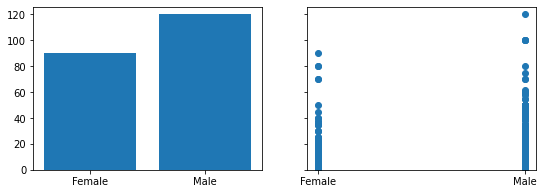

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)
axs[0].bar(df.gender, df.nflights)
axs[1].scatter(df.gender, df.nflights)


### Filter outlier

In [35]:
df = df.loc[df['nflights'] < 300]

# only one point filtered
df['gender'].value_counts()
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 0 to 1064
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    1064 non-null   object 
 1   nflights  1064 non-null   float64
 2   nps       1064 non-null   float64
dtypes: float64(2), object(1)
memory usage: 33.2+ KB


### INDEPDENT T-TEST USING RESEARCHPY

The method returns 2 data frames, one that contains the summary statistical information and the other that contains the statistical test information.

In [6]:
rp.ttest(group1= df['nps'][df['gender'] == 'Male'], group1_name="Male",
         group2= df['nps'][df['gender'] == 'Female'], group2_name="Female")

C:\Users\Toshiba\anaconda3\envs\geo_env\lib\site-packages\researchpy\ttest.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


(   Variable       N      Mean        SD        SE  95% Conf.  Interval
 0      Male   784.0  8.196429  2.538528  0.090662   8.018460  8.374397
 1    Female   280.0  8.550000  2.401687  0.143528   8.267464  8.832536
 2  combined  1064.0  8.289474  2.506969  0.076856   8.138667  8.440281,
               Independent t-test    results
 0  Difference (Male - Female) =     -0.3536
 1          Degrees of freedom =   1062.0000
 2                           t =     -2.0288
 3       Two side test p value =      0.0427
 4      Difference < 0 p value =      0.0214
 5      Difference > 0 p value =      0.9786
 6                   Cohen's d =     -0.1412
 7                   Hedge's g =     -0.1411
 8               Glass's delta =     -0.1393
 9                 Pearson's r =      0.0621)

### Interpretation
The average likeability recommendation for Women, W = 8.55 (CI=[8.27, 8.83]) significantly 
differ than the males, M = 8.20 (CI=8.02, 8.37): t(1063)= 2.029 and p=0.043.
    
Women($mean_{1}=8.55$) are therefore significantly more likey to recommend Oddjob Airways than men($mean_{2}=8.20$)

### ASSUMPTION CHECK
The assumptions in this section need to be met in order for the test results to be considered valid. 
A more in-depth look at parametric assumptions is provided here,which includes some potential remedies.

### THE TWO SAMPLES ARE INDEPENDENT
This assumption is tested when the study is designed. 
What this means is that no individual has data in group A and B (i.e no reapeated observations).

### POPULATION DISTRIBUTIONS ARE NORMAL
One method of visually checking the distribution is to use a probability plot with or without the correlation value, 
$R^{2}$, to assess the observed values correlation with the theoretical distribution in question - 
in the current case it would be the Gaussian (a.k.a the normal) distribution. 

### HOMOGENEITY OF VARIANCE
One of the assumptions is that both groups have equal variances. 
One method for testing this assumption is the Levene's test of homogeneity of variances

In [7]:
stats.levene(df['nps'][df['gender'] == 'Female'],
             df['nps'][df['gender'] == 'Male'],
             center='mean')
                      



LeveneResult(statistic=0.5304410893148348, pvalue=0.4665820315895317)

The test is insignificant(p=0.467).Therefore we cannot reject the Levene's test and can assume the variances of male and female are equally distributed.
No effect to these groups with the variances, hence we can stick to the independent sample t-test.

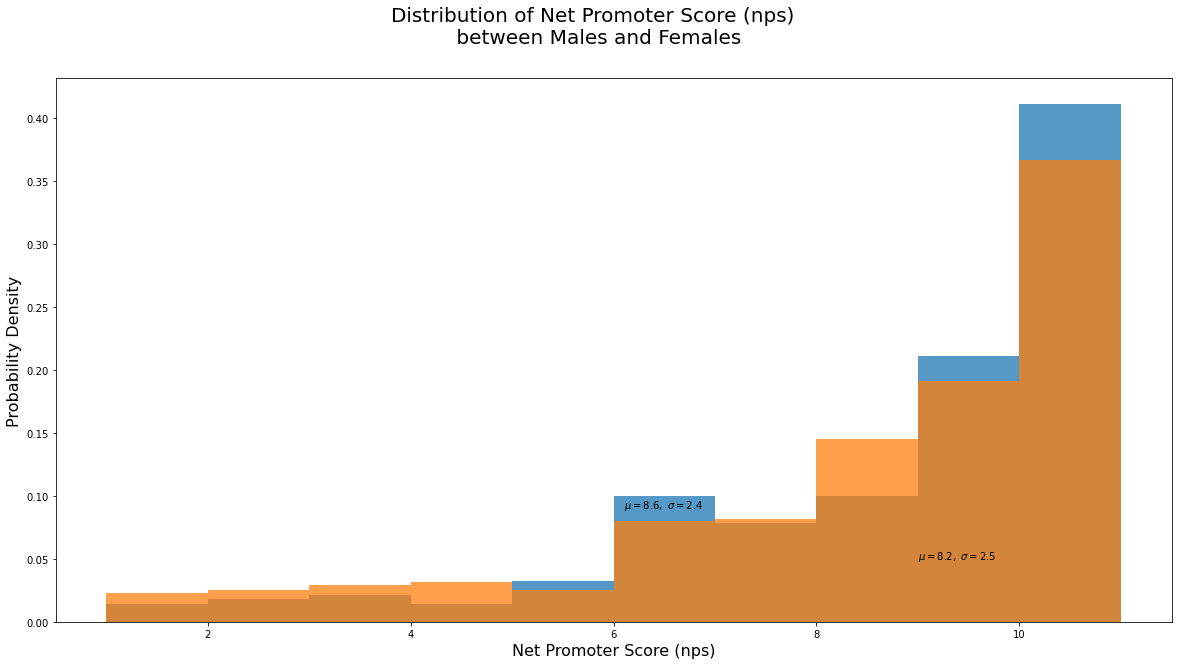

In [17]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

nps_female = plt.hist(df['nps'][df['gender'] == 'Female'], label="Female",
                    density=True,
                    alpha=0.75)
nps_male = plt.hist(df['nps'][df['gender'] == 'Male'], label="Male",
                    density=True,
                    alpha=0.75)

plt.suptitle("Distribution of Net Promoter Score (nps) \n between Males and Females", fontsize= 20)
plt.xlabel("Net Promoter Score (nps)", fontsize=16)
plt.ylabel("Probability Density", fontsize=16)

plt.text(6.1, .09,
         f"$\mu= {df['nps'][df['gender'] == 'Female'].mean(): .1f}, \ \sigma= {df['nps'][df['gender'] == 'Female'].std(): .1f}$")
plt.text(9, .05,
         f"$\mu= {df['nps'][df['gender'] == 'Male'].mean(): .1f}, \ \sigma= {df['nps'][df['gender'] == 'Male'].std(): .1f}$")

plt.show()